# Hozier

Loading in the necessary libraries. 

In [1]:
import pandas as pd
import glob
import os

Loading in and concatenating each csv file (individual csv files for each album)

In [2]:
df_h = pd.concat(
    map(pd.read_csv, ["/Users/annacapels/Desktop/DS Projects/Hozier Lyrics/Workspace/Hozier_Extended_Version.csv", "/Users/annacapels/Desktop/DS Projects/Hozier Lyrics/Workspace/Wasteland, Baby!.csv"]), ignore_index=True)
df_h.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyric,Line
0,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,My lover's got humour,1
1,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,She's the giggle at a funeral,2
2,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,Knows everybody's disapproval,3
3,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,I should've worshipped her sooner,4
4,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,If the heavens ever did speak,5


 Below, I group each track title and their lyrics into albums by assuming that each album was released in a different year.

> 
- X represents a list of each different lines of lyrics for a track title
- Groupby puts everything into a list
- .join strings all lyrics into a block of lyrics
- reset_index will make it easier to select all columns as we move forward

In [3]:
songs_h = df_h.groupby("Track_Title").agg({"Lyric": lambda x: " ".join(x), "Year": "max"}).reset_index()

Next, I say how many characters can be shown in a column within the dataframe. 

In [4]:
pd.options.display.max_colwidth = 500

songs_h.head()

,Track_Title,Lyric,Year
0,Almost (Sweet Music),"I came in from the outside, burnt out from a joyride She likes to roll here in my ashes anyway Played from the bedside is Stella by Starlight That was my heart, the drums that start off night and day The same kind of music haunts her bedroom I'm almost me again, she's almost you I wouldn't know where to start Sweet music playin' in the dark Be still my foolish heart Don't ruin this on me I wouldn't know where to start Sweet music playin' in the dark Be still my foolish heart Don't ruin this ...",2019
1,Angel Of Small Death & The Codeine Scene,"I watch the work of my kin bold and boyful Toying somewhere between love and abuse Calling to join them the wretched and joyful Shaking the wings of their terrible youths Freshly disowned in some frozen devotion No more alone or myself could I be Lurched like a stray to the arms that were open No shortage of sordid, no protest from me With her sweetened breath, and her tongue so mean She's the angel of small death and the codeine scene With her straw-blonde hair, her arms hard and lean She's...",2014
2,Arsonist's Lullaby,"When I was a child, I heard voices... Some would sing and some would scream You soon find you have few choices... I learned the voices died with me When I was a child, I'd sit for hours Staring into open flame Something in it had a power, Could barely tear my eyes away All you have is your fire... And the place you need to reach - Don't you ever tame your demons But always keep 'em on a leash When I was 16, my senses fooled me Thought gasoline was on my clothes I knew that something would al...",2014
3,As It Was,"There is a roadway Muddy and foxgloved Whenever I'd had life enough My heart is screaming of And in a few days I will be there, love Whatever here that's left of me Is yours just as it was Just as it was, baby Before the otherness came And I knew its name The drug, the dark, The light, the flame The highs hit the heights of my baby And its hold had the fight of my baby And the lights were as bright as my baby But your love was unmoved Tell me if somehow Some of it remains How long you would ...",2019
4,Be,"When all the worst we fear lets fall its weight When the gyre widens on and when the wave breaks When St. Peter loses cool and bars the Gates When Atlas acts the maggot, makes his arms shake When the birds are heard again in their singing Once atrocity is hoarse from voicing shame When the earth is trembling on some new beginning With the same sweet shock of when Adam first came Be, be, be, be, be Be as you've always been Be, be, be, be, be Be as you've always been (lover, be good to me) Be ...",2019


Checking how many songs of Hozier I have in total

In [5]:
len(songs_h)

31

# Start of Analyzation

## Finding themes throughout each album by using sentiment analysis

First, we download the correct packages for NLP. 

In [6]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annacapels/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stop_words.extend is edited by individually putting in words that I deemed insignificant after vecotrizing and tokenizing each word to help the words for each theme become more specific. 

In [7]:
stop_words.extend(["oh", "like","should", "would", "honey", "could", "through", "let", "babe", "baby" "lover", "tell", "wouldn't", "couldn't", "and", "the", "shouldn't"])

min_df here is telling that if a word is seen less than 10% of the time that those words are not considered and will be excluded from the vocabulary. 

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Defining the file paths for the CSV files
csv_files = ["/Users/annacapels/Desktop/DS Projects/Hozier Lyrics/Workspace/Hozier_Extended_Version.csv", "/Users/annacapels/Desktop/DS Projects/Hozier Lyrics/Workspace/Wasteland, Baby!.csv"]

#Reading in the CSV files as a DataFrame
df = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)

#Grouping the lyrics by track title and year
songs = df.groupby("Track_Title").agg({"Lyric": lambda x: " ".join(x), "Year": "max"}).reset_index()

#Defining the TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0.1)

#Applying text vectorization to the lyrics
tfidf = vectorizer.fit_transform(songs['Lyric'])

Here I chose to do 6 different categories/themes/topics

In [9]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 6)

In [10]:
topic_values = nmf.fit_transform(tfidf)

This bit of code below overall makes 'chooses' the individual words for each of the different topics. 

>
- for loop: loops through the different nmf components
- enumerate: lets us get individual value and index of value looping over
- message: what the individual words are in the topics AND write topic number while .format will add topic # + 1 (index starts @ zero)
- vertorizer: says for each topic grab the top 10 words for that index
>


In [11]:
for topic_num, topic in enumerate(nmf.components_):
    message = "topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 :-1]])
    print(message)

topic #1: love never try back tonight light words first done
topic #2: know better run name still hand heart find done
topic #3: baby dark tree hold left though cold long fight
topic #4: good lover life always fire god tonight long saw
topic #5: death little feel arms free never life god keep
topic #6: ask sweet put way time right hand always came


After the first run through of the code above, I run back through to include stop_words.extend, once again to make the words in the topics more specific. 

From those topics I identified different themes. 

In [12]:
topic_labels = ['devotion', 'loyalty', 'religious', 'nature', 'mortality', 'love']

Here I am making a new data frame and then updating it to see each song with values and it's lyrics.

In [13]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)

In [14]:
songs = songs.join(df_topics)
songs.head()

,Track_Title,Lyric,Year,devotion,loyalty,religious,nature,mortality,love
0,Almost (Sweet Music),"I came in from the outside, burnt out from a joyride She likes to roll here in my ashes anyway Played from the bedside is Stella by Starlight That was my heart, the drums that start off night and day The same kind of music haunts her bedroom I'm almost me again, she's almost you I wouldn't know where to start Sweet music playin' in the dark Be still my foolish heart Don't ruin this on me I wouldn't know where to start Sweet music playin' in the dark Be still my foolish heart Don't ruin this ...",2019,0.000000,0.401895,0.005506,0.000000,0.000000,0.138568
1,Angel Of Small Death & The Codeine Scene,"I watch the work of my kin bold and boyful Toying somewhere between love and abuse Calling to join them the wretched and joyful Shaking the wings of their terrible youths Freshly disowned in some frozen devotion No more alone or myself could I be Lurched like a stray to the arms that were open No shortage of sordid, no protest from me With her sweetened breath, and her tongue so mean She's the angel of small death and the codeine scene With her straw-blonde hair, her arms hard and lean She's...",2014,0.000000,0.000000,0.000000,0.000000,0.713055,0.000000
2,Arsonist's Lullaby,"When I was a child, I heard voices... Some would sing and some would scream You soon find you have few choices... I learned the voices died with me When I was a child, I'd sit for hours Staring into open flame Something in it had a power, Could barely tear my eyes away All you have is your fire... And the place you need to reach - Don't you ever tame your demons But always keep 'em on a leash When I was 16, my senses fooled me Thought gasoline was on my clothes I knew that something would al...",2014,0.034000,0.066543,0.000000,0.110352,0.000000,0.229093
3,As It Was,"There is a roadway Muddy and foxgloved Whenever I'd had life enough My heart is screaming of And in a few days I will be there, love Whatever here that's left of me Is yours just as it was Just as it was, baby Before the otherness came And I knew its name The drug, the dark, The light, the flame The highs hit the heights of my baby And its hold had the fight of my baby And the lights were as bright as my baby But your love was unmoved Tell me if somehow Some of it remains How long you would ...",2019,0.065777,0.000000,0.665153,0.063087,0.000000,0.000000
4,Be,"When all the worst we fear lets fall its weight When the gyre widens on and when the wave breaks When St. Peter loses cool and bars the Gates When Atlas acts the maggot, makes his arms shake When the birds are heard again in their singing Once atrocity is hoarse from voicing shame When the earth is trembling on some new beginning With the same sweet shock of when Adam first came Be, be, be, be, be Be as you've always been Be, be, be, be, be Be as you've always been (lover, be good to me) Be ...",2019,0.074263,0.000000,0.000000,0.605334,0.000000,0.075753


Next, I will set a threshold. This means that if a tokenization is higher than 10% it will show as a score of 1 and if lower than 10% it will show as 0. 

In [15]:
songs.loc[songs['devotion'] >= 0.1, 'devotion'] = 1
songs.loc[songs['loyalty'] >= 0.1, 'loyalty'] = 1
songs.loc[songs['religious'] >= 0.1, 'religious'] = 1
songs.loc[songs['nature'] >= 0.1, 'nature'] = 1
songs.loc[songs['mortality'] >= 0.1, 'mortality'] = 1
songs.loc[songs['love'] >= 0.1, 'love'] = 1

In [16]:
songs.loc[songs['devotion'] <= 0.1, 'devotion'] = 0
songs.loc[songs['loyalty'] <= 0.1, 'loyalty'] = 0
songs.loc[songs['religious'] <= 0.1, 'religious'] = 0
songs.loc[songs['nature'] <= 0.1, 'nature'] = 0
songs.loc[songs['mortality'] <= 0.1, 'mortality'] = 0
songs.loc[songs['love'] <= 0.1, 'love'] = 0

Checking that it worked...

In [17]:
songs.head()

,Track_Title,Lyric,Year,devotion,loyalty,religious,nature,mortality,love
0,Almost (Sweet Music),"I came in from the outside, burnt out from a joyride She likes to roll here in my ashes anyway Played from the bedside is Stella by Starlight That was my heart, the drums that start off night and day The same kind of music haunts her bedroom I'm almost me again, she's almost you I wouldn't know where to start Sweet music playin' in the dark Be still my foolish heart Don't ruin this on me I wouldn't know where to start Sweet music playin' in the dark Be still my foolish heart Don't ruin this ...",2019,0.0,1.0,0.0,0.0,0.0,1.0
1,Angel Of Small Death & The Codeine Scene,"I watch the work of my kin bold and boyful Toying somewhere between love and abuse Calling to join them the wretched and joyful Shaking the wings of their terrible youths Freshly disowned in some frozen devotion No more alone or myself could I be Lurched like a stray to the arms that were open No shortage of sordid, no protest from me With her sweetened breath, and her tongue so mean She's the angel of small death and the codeine scene With her straw-blonde hair, her arms hard and lean She's...",2014,0.0,0.0,0.0,0.0,1.0,0.0
2,Arsonist's Lullaby,"When I was a child, I heard voices... Some would sing and some would scream You soon find you have few choices... I learned the voices died with me When I was a child, I'd sit for hours Staring into open flame Something in it had a power, Could barely tear my eyes away All you have is your fire... And the place you need to reach - Don't you ever tame your demons But always keep 'em on a leash When I was 16, my senses fooled me Thought gasoline was on my clothes I knew that something would al...",2014,0.0,0.0,0.0,1.0,0.0,1.0
3,As It Was,"There is a roadway Muddy and foxgloved Whenever I'd had life enough My heart is screaming of And in a few days I will be there, love Whatever here that's left of me Is yours just as it was Just as it was, baby Before the otherness came And I knew its name The drug, the dark, The light, the flame The highs hit the heights of my baby And its hold had the fight of my baby And the lights were as bright as my baby But your love was unmoved Tell me if somehow Some of it remains How long you would ...",2019,0.0,0.0,1.0,0.0,0.0,0.0
4,Be,"When all the worst we fear lets fall its weight When the gyre widens on and when the wave breaks When St. Peter loses cool and bars the Gates When Atlas acts the maggot, makes his arms shake When the birds are heard again in their singing Once atrocity is hoarse from voicing shame When the earth is trembling on some new beginning With the same sweet shock of when Adam first came Be, be, be, be, be Be as you've always been Be, be, be, be, be Be as you've always been (lover, be good to me) Be ...",2019,0.0,0.0,0.0,1.0,0.0,0.0


Going into the songs dataframe and grouping everything by year, then sum will figure out how often a topic appears in a song for each year. 

In [18]:
year_topics = songs.groupby("Year").sum().reset_index()

In [19]:
year_topics.head()

,Year,Track_Title,Lyric,devotion,loyalty,religious,nature,mortality,love
0,2014,Angel Of Small Death & The Codeine SceneArsonist's LullabyCherry WineForeigner's GodFrom EdenIn A Week (ft. Karen Cowley)In The Woods SomewhereIt Will Come Back Jackie And WilsonLike Real People DoMy Love Will Never DieRunSedatedSomeone New Take Me to ChurchTo Be AloneWork Song,"I watch the work of my kin bold and boyful Toying somewhere between love and abuse Calling to join them the wretched and joyful Shaking the wings of their terrible youths Freshly disowned in some frozen devotion No more alone or myself could I be Lurched like a stray to the arms that were open No shortage of sordid, no protest from me With her sweetened breath, and her tongue so mean She's the angel of small death and the codeine scene With her straw-blonde hair, her arms hard and lean She's...",2.0,7.0,2.0,4.0,4.0,6.0
1,2019,"Almost (Sweet Music)As It WasBe Dinner & DiatribesMovementNina Cried Power (ft. Mavis Staples)No Plan NobodyShrikeSunlightTalkTo Noise Making (Sing)Wasteland, Baby!Would That I","I came in from the outside, burnt out from a joyride She likes to roll here in my ashes anyway Played from the bedside is Stella by Starlight That was my heart, the drums that start off night and day The same kind of music haunts her bedroom I'm almost me again, she's almost you I wouldn't know where to start Sweet music playin' in the dark Be still my foolish heart Don't ruin this on me I wouldn't know where to start Sweet music playin' in the dark Be still my foolish heart Don't ruin this ...",7.0,4.0,4.0,2.0,1.0,2.0


Importing libraries to visualize findings.

In [20]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, "Hozier's frequency of themes found by music released each year")

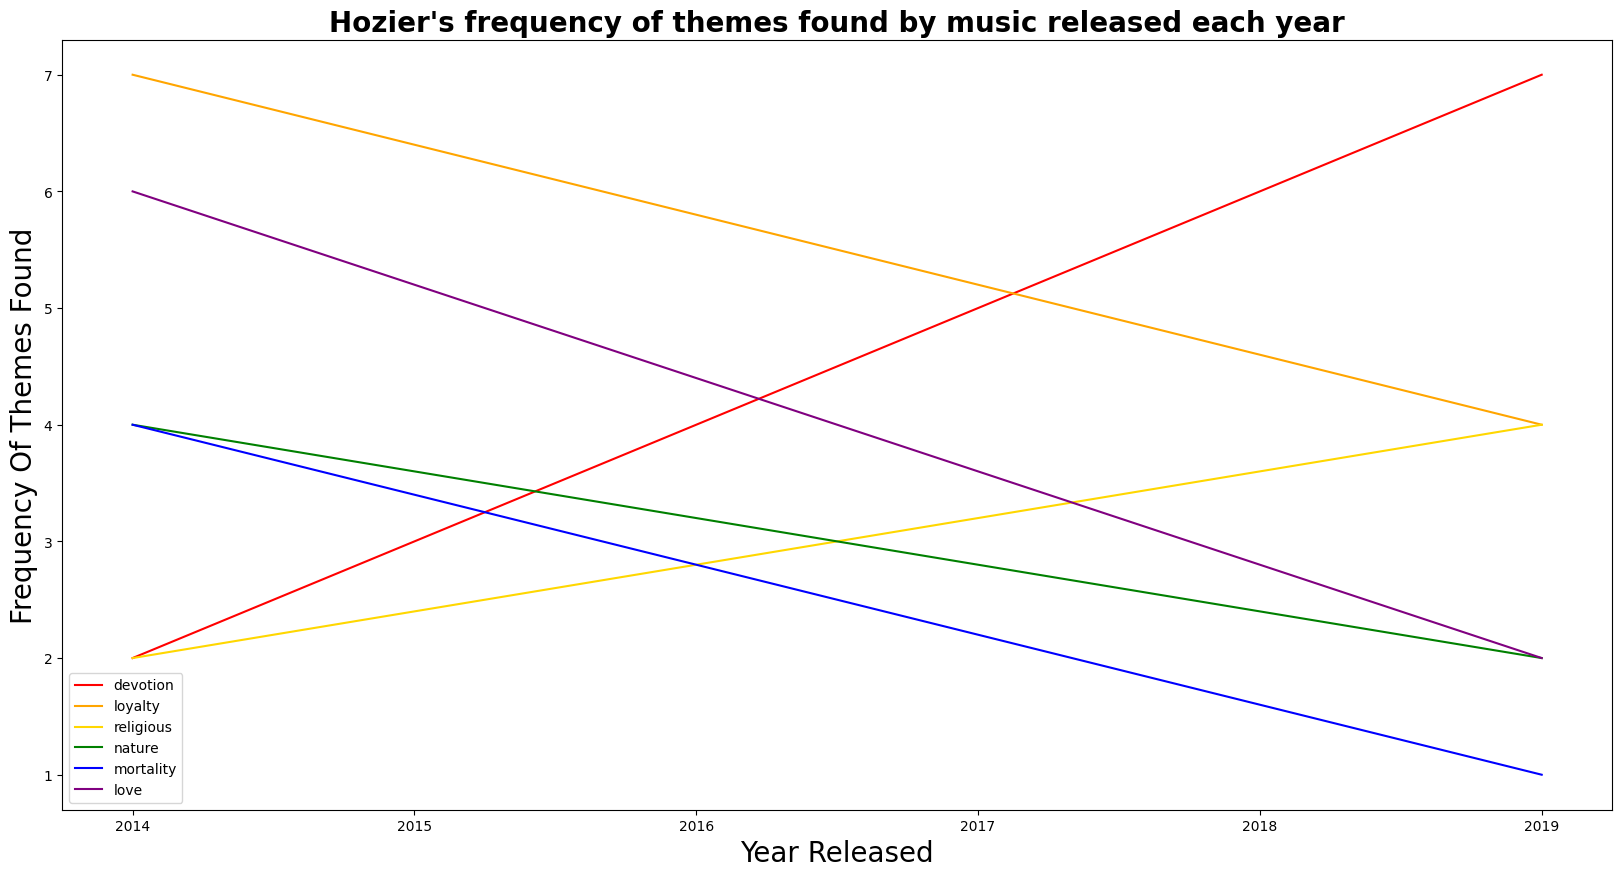

In [21]:
plt.figure(figsize = (20,10))
plt.plot(year_topics["Year"], year_topics['devotion'], label = topic_labels[0], c='red')
plt.plot(year_topics["Year"], year_topics['loyalty'], label = topic_labels[1], c='orange')
plt.plot(year_topics["Year"], year_topics['religious'], label = topic_labels[2], c='gold')
plt.plot(year_topics["Year"], year_topics['nature'], label = topic_labels[3], c='green')
plt.plot(year_topics["Year"], year_topics['mortality'], label = topic_labels[4], c='blue')
plt.plot(year_topics["Year"], year_topics['love'], label = topic_labels[5], c='purple')
plt.legend()

#label to help keep track of each individual plots

#Setting axis, title, + font
font1 = {'family':'sans', 'color': 'black', 'size':20}
plt.xlabel("Year Released", loc='center', fontdict=font1)
plt.ylabel("Frequency Of Themes Found", loc='center', fontdict=font1)
plt.title("Hozier's frequency of themes found by music released each year", loc='center', fontdict=font1, fontweight='bold')


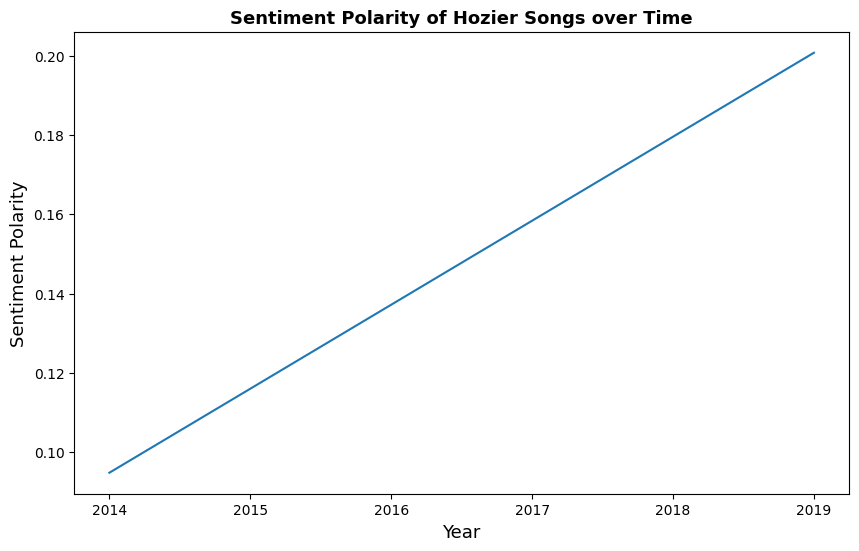

In [22]:
from textblob import TextBlob

#Defining a function to get the sentiment polarity score for each set of lyrics
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

#Applying the function to the lyrics column of the songs DataFrame
songs['Sentiment_Polarity'] = songs['Lyric'].apply(get_sentiment_polarity)

#Grouping the songs by year and calculate the mean sentiment polarity for each year
year_sentiment = songs.groupby('Year')['Sentiment_Polarity'].mean().reset_index()

#Ploting the sentiment polarity over time
font1 = {'family':'sans', 'color': 'black', 'size':13}
plt.figure(figsize=(10, 6))
plt.plot(year_sentiment['Year'], year_sentiment['Sentiment_Polarity'])
plt.xlabel('Year', loc='center', fontdict=font1)
plt.ylabel('Sentiment Polarity', loc='center', fontdict=font1)
plt.title('Sentiment Polarity of Hozier Songs over Time', loc='center', fontdict=font1, fontweight = 'bold')
plt.show()

## Lyric Generator

In [23]:
from collections.abc import Mapping
import markovify
import language_tool_python

#Combining all lyrics into a single string
lyrics = ' '.join(songs['Lyric'])

#Making a Markov model of the lyrics
model = markovify.Text(lyrics, state_size=2)

#Generating and correcting new sentences
tool = language_tool_python.LanguageTool('en-US')
for i in range(2):
    #Making a new sentence
    sentence = model.make_sentence()

    if sentence is not None:
        #Fixing grammar errors in the sentence
        corrected_sentence = tool.correct(sentence)

        #Printing the original and corrected sentences
        print('Original sentence:', sentence)
        print('Corrected sentence:', corrected_sentence)
    else:
        print('Error: Unable to generate a sentence.')

#Run time: 8 seconds

Original sentence: Once you hear me howling, once you hear me howling outside your door Don't you hear me howling babe!
Corrected sentence: Once you hear me howling, once you hear me howling outside your door Don't you hear me howling babe!
Original sentence: Don't be kind to me Screaming the name of a foreigner's god The purest expression of grief Wondering who I am when I'm alone I'm something else when I see you You don't have to sing it right But who could call you wrong?
Corrected sentence: Don't be kind to me Screaming the name of a foreigner's god The purest expression of grief Wondering who I am when I'm alone I'm something else when I see you don't have to sing it right, But who could call you wrong?


## Sentiment Analysis

Importing necessary libraries

In [24]:
import nltk
import numpy as np
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/annacapels/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Below, I put the boundaries to define the category negative as anything lower than a sentiment rating of -0.35. Positive is anything above 0.35 and neutral are any scores between -0.35 and 0.35. 

In [25]:
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

df['sentiment_rating'] = pd.DataFrame(df.Lyric.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_rating'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

df.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyric,Line,sentiment_rating,sentiment
0,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,My lover's got humour,1,0.4767,positive
1,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,She's the giggle at a funeral,2,0.0772,neutral
2,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,Knows everybody's disapproval,3,0.0000,neutral
3,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,I should've worshipped her sooner,4,0.5719,positive
4,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,If the heavens ever did speak,5,0.4019,positive


## Lyrical Density 

Importing libraries. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Saving df with the lyrics to a csv 
trial_df = df 
trial_df.to_csv('Lyrics-HOZIER.csv')

In [28]:
df.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyric,Line,sentiment_rating,sentiment
0,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,My lover's got humour,1,0.4767,positive
1,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,She's the giggle at a funeral,2,0.0772,neutral
2,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,Knows everybody's disapproval,3,0.0000,neutral
3,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,I should've worshipped her sooner,4,0.5719,positive
4,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,If the heavens ever did speak,5,0.4019,positive


In [29]:
df['characters'] = df.Lyric.str.len()
df['words'] = df.Lyric.str.split().str.len()
df['lines'] = df.Lyric.str.split('\n').str.len()
df['uniq_words'] = df.Lyric.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['uniq_words'] / df['words']

df.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyric,Line,sentiment_rating,sentiment,characters,words,lines,uniq_words,lexical_density
0,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,My lover's got humour,1,0.4767,positive,21,4,1,4,1.0
1,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,She's the giggle at a funeral,2,0.0772,neutral,29,6,1,6,1.0
2,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,Knows everybody's disapproval,3,0.0000,neutral,29,3,1,3,1.0
3,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,I should've worshipped her sooner,4,0.5719,positive,33,5,1,5,1.0
4,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,If the heavens ever did speak,5,0.4019,positive,29,6,1,6,1.0


In [30]:
#Renaming Columns so have Capatalized + 'Units'

df = df.rename(columns={
    'Lyric': 'Lyrics',
    'sentiment': 'Sentiment Category',
    'sentiment_rating': 'Sentiment Rating',
    'characters': 'Characters',
    'words': 'Number of Words',
    'lines': 'Number of Lines',
    'uniq_words': 'Number of Unique Words',
    'lexical_density': 'Lexical Density'
})

In [31]:
df.head()

,Artist,Year,Album_Title,Track_Title,Track_Number,Lyrics,Line,Sentiment Rating,Sentiment Category,Characters,Number of Words,Number of Lines,Number of Unique Words,Lexical Density
0,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,My lover's got humour,1,0.4767,positive,21,4,1,4,1.0
1,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,She's the giggle at a funeral,2,0.0772,neutral,29,6,1,6,1.0
2,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,Knows everybody's disapproval,3,0.0000,neutral,29,3,1,3,1.0
3,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,I should've worshipped her sooner,4,0.5719,positive,33,5,1,5,1.0
4,Hozier,2014,Hozier (Special Edition),Take Me to Church,1,If the heavens ever did speak,5,0.4019,positive,29,6,1,6,1.0


Then I sum columns words and number of unique words, and divide total_uniq with total_words to get a total lyrical density. 
Lyrical density simplified is essentially the larger the density score the more lyrical or poetical the songs may seem. On the other hand, a smaller density score may mean that the songs are more straightforward and get directly to the point. 

In [32]:
df['Number of Words'].sum()

8749

In [33]:
def total_density():
    total_words = df['Number of Words'].sum()
    print('The total amount of words is',(total_words))
    total_uniq = df['Number of Unique Words'].sum()
    print('The total amount of unique words is',(total_uniq))
    return total_uniq / total_words

print('The total density is', (total_density()))

The total amount of words is 8749
The total amount of unique words is 8332
The total density is 0.9523374099897131


# Graphs comparing Sentiment, Lexical Desnity, and Unique Words. 

## Sentiment Category vs Lexical Density

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_1603/1859551052.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, order=['negative', 'neutral', 'positive'], jitter=0.2, size=2.5, palette=custom_palette)


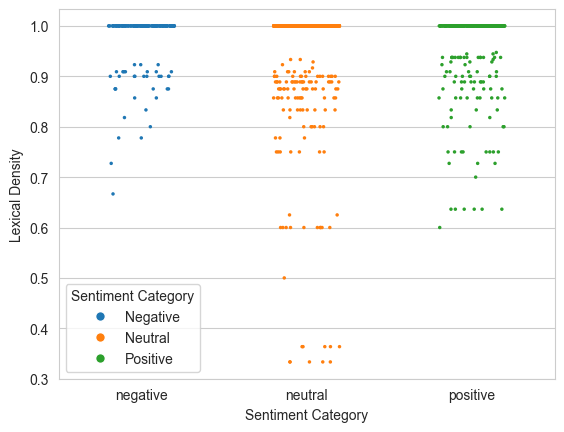

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom colors and legend
sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, order=['negative', 'neutral', 'positive'], jitter=0.2, size=2.5, palette=custom_palette)

#Creating a custom legend with three colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor=custom_palette[0], markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor=custom_palette[1], markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor=custom_palette[2], markersize=7)]
plt.legend(title='Sentiment Category', loc='lower left', handles=legend_elements)

#Adding labels for the x and y axes
plt.xlabel('Sentiment Category')
plt.ylabel('Lexical Density')

#Showing the plot
plt.show()

This is another way of looking at the data, but I find this more difficult than the one above. 

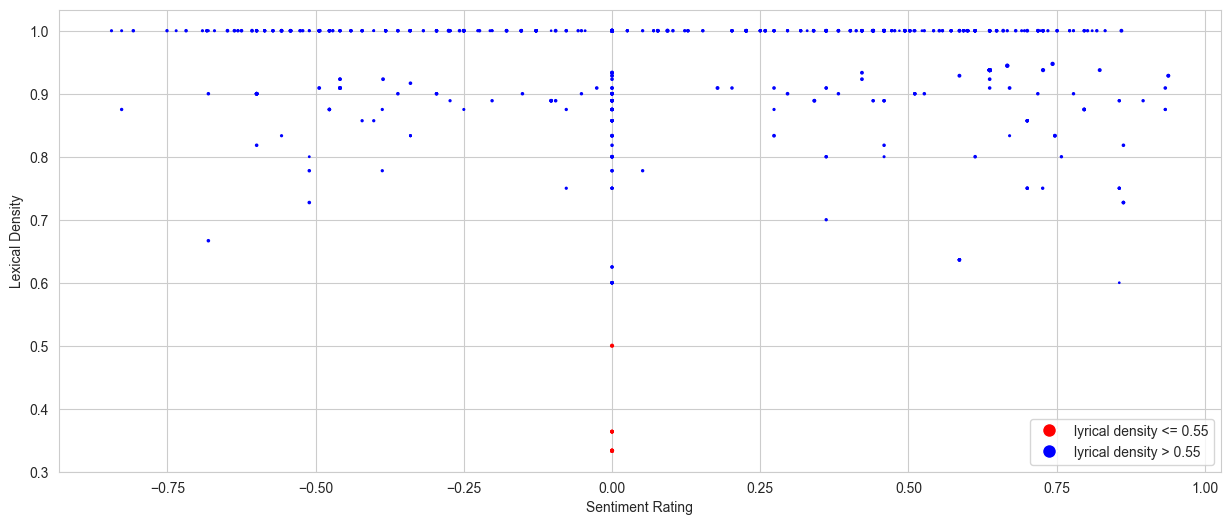

In [35]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Defining custom colors for the legend
colors = {'red': 'lyrical density <= 0.55', 'blue': 'lyrical density > 0.55'}

#Creating custom legend elements using Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=colors['red'], markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label=colors['blue'], markerfacecolor='blue', markersize=10)]

#Making the scatter plot
df.plot.scatter(x='Sentiment Rating', y='Lexical Density', s=df['Characters']/20,
                c=np.where(df['Lexical Density'].le(0.55), "red", "blue"),
                figsize=(15, 6))

#Adding the custom legend to the plot
plt.legend(handles=legend_elements, loc='lower right')

#Showing
plt.show()

#red=if lyrical density less than or equal to .55
#blue=data if lyrical density greater than .55
#The size of each dot is determined by the corresponding value in the characters column divided by 20.

To see if there is any linear relationship beween the variables I will find the correlation coefficient (also commonly known as the 'R Value') which measures the strength and direction of a linear relationship between two variables. 

Finding the R Value

In [36]:
import pandas as pd

#Finding the correlation coefficient between Sentiment Rating and Lexical Density
corr_coeff = df['Sentiment Rating'].corr(df['Lexical Density'])

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: -0.0734468132265821


## Analysis of Sentiment Category vs Lexcial Density

There seems to be no statistically significant linear relationship between the variables of sentiment category and lexical density. 

## Sentiment Category vs Number of Unique Words

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_1603/3361886664.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sentiment Category', y='Number of Unique Words', data=df, order=['negative', 'neutral', 'positive'], jitter=0.3, size=3, palette=custom_palette)


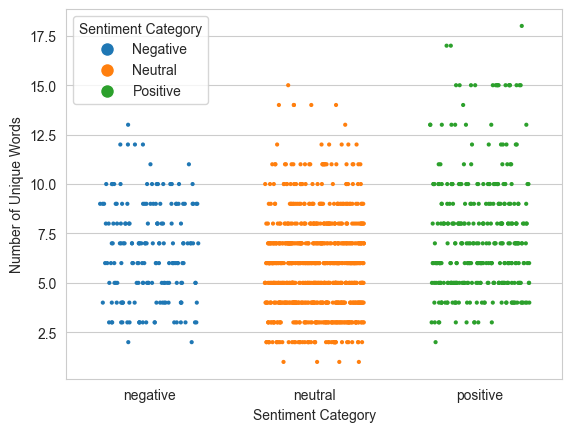

In [37]:
###WORKING...COMPARING:
#NUMBER OF UNIQUE WORDS VS SENTIMENT CATEGORY#

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom colors and legend
sns.stripplot(x='Sentiment Category', y='Number of Unique Words', data=df, order=['negative', 'neutral', 'positive'], jitter=0.3, size=3, palette=custom_palette)

#Creating a custom legend with three colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor=custom_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor=custom_palette[1], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor=custom_palette[2], markersize=10)]
plt.legend(title='Sentiment Category', loc='upper left', handles=legend_elements)

#Adding labels for the x and y axes
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Unique Words')

#Showing the plot
plt.show()

## Analysis of Sentiment Category vs Number of Unique Words

Finding the R Value. 

In [38]:
#NUMBER OF UNIQUE WORDS + SENTIMENT CATEGORY#

import pandas as pd

#Grouping the data by Sentiment Category and calculate the mean Number of Unique Words for each group
grouped_df = df.groupby('Sentiment Category')['Number of Unique Words'].mean()

#Calculating the correlation coefficient (r value) between Number of Unique Words and Sentiment Category
corr_coeff = grouped_df.corr(pd.Series([0, 1, 2]))

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: nan


Since we got a null value for an R value, I decided to use  Kendall's rank correlation coefficient (also commonly known as Kendall's tau) is a measure of rank correlation between two variables; meaning it assess similarity of the orders of data points rather than the specific values of the variables themselves. I did this as I doubted that the number of unique words and sentiment category would be a linear relationship. 

In [39]:
#NUMBER OF UNIQUE WORDS + SENTIMENT CATEGORY#
# If the absolute value is close to 0
# then there is a weak or no monotonic relationship between the variables.

from scipy.stats import kendalltau

#Calculating the Kendall rank correlation coefficient between Lexical Density and Sentiment Category
kendall_coeff, kendall_pvalue = kendalltau(df['Number of Unique Words'], df['Sentiment Category'])

#Printing the correlation coefficient
print("Kendall Rank Correlation Coefficient:", kendall_coeff)

Kendall Rank Correlation Coefficient: 0.10989132451124474


From Kendall's tau we see that there is essentially no monotonic relationship between the variables sentiment category and number of unique words, as the number is so close to 0. 

## Sentiment Category vs Lexical Desnity vs Unique Words 

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_1603/3187391479.py:10: UserWarning: 
The palette list has fewer values (3) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, hue='Number of Unique Words', order=['negative', 'neutral', 'positive'], jitter=0.27, size=3, palette=custom_palette)


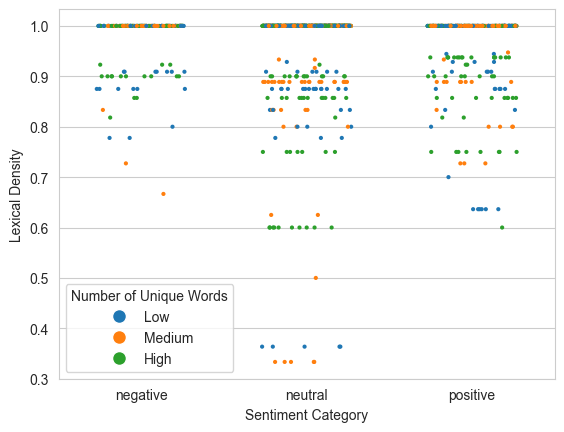

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom legend
sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, hue='Number of Unique Words', order=['negative', 'neutral', 'positive'], jitter=0.27, size=3, palette=custom_palette)

#Creating a custom legend with three dots
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Low', markerfacecolor=custom_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Medium', markerfacecolor=custom_palette[1], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='High', markerfacecolor=custom_palette[2], markersize=10)]
plt.legend(title='Number of Unique Words', loc='lower left', handles=legend_elements)

#Showing
plt.show()

Finding the R Values. 

Already found for:
Number of Unique Words vs Sentiment Category 
> 
- R Value: N/A
- Kendall Rank Correlation Coefficient: 0.11
>

Sentiment Category vs Lexical Density
>
- R Value: -0.07
- Kendall Rank Correlation Coefficient: Did not execute because an R Value was found. 
>

As we can see so far there have been no significant linear relationships between any variables yet. Additionally, the only relationship we haven't found yet is between Lexical Density and the Number of Unique Words. Again, we will check for an R value first, and if there is none present we will move onto doing a Kendall Rank Correlation. 

In [41]:
#LEXICAL DENSITY + NUMBER OF UNIQUE WORDS#

import pandas as pd

#Calculating the correlation coefficient between Lexical Density and Number of Unique Words
corr_coeff = df['Lexical Density'].corr(df['Number of Unique Words'])

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: -0.05748275405345103


## Type-Token  (TTR)

TTR is a metric used to measure the lexical diversity or richness of a text as it calculates the ratio of unique words (types) to the total number of words (tokens). 
>
[forumla: TTR = (Number of Unique Words) / (Total Number of Words)]
>
Higher TTR indicates greater diversity of vocabulary while a lower TTR suggests a more repetitive vocabulary. 

Importing libraries. 

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [43]:
text = trial_df.to_csv(sep=' ', index=False, header=False)


tokenized = word_tokenize(text)
len(tokenized)
len(set(tokenized))

1842

In [44]:
def lexical_richness(text):
    return len(set(text)) / len(text)

#Getting the percentage
lexical_richness(tokenized)

0.044262885978613484

## Sentiment Analysis of Albums and Songs

### Sentiment Rating for Each Album or EP

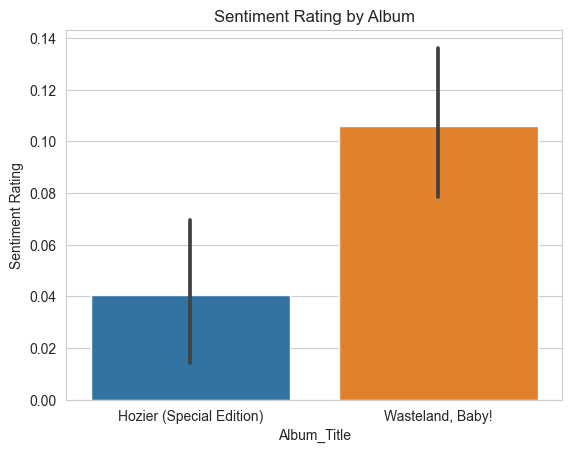

In [45]:
import seaborn as sns

#Creating a palette of pastel colors
palette = sns.color_palette('pastel')

#Making a bar plot of sentiment rating by album with pastel-colored bars
sns.barplot(x='Album_Title', y='Sentiment Rating', data=df) #palette=palette)

#Setting title and labels
plt.title('Sentiment Rating by Album')
plt.xlabel('Album_Title')
plt.ylabel('Sentiment Rating')
plt.show()


## Sentiment Ratings for Each Track for Each Album

### Wasteland, Baby!

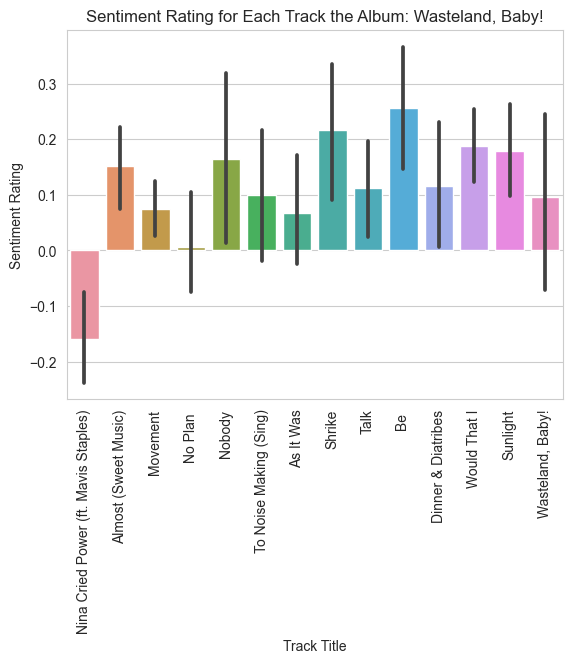

In [46]:
import seaborn as sns

#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Wasteland, Baby!'])

#Setting the plot title and labels
plt.title('Sentiment Rating for Each Track the Album: Wasteland, Baby!')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### Hozier (Special Edition)

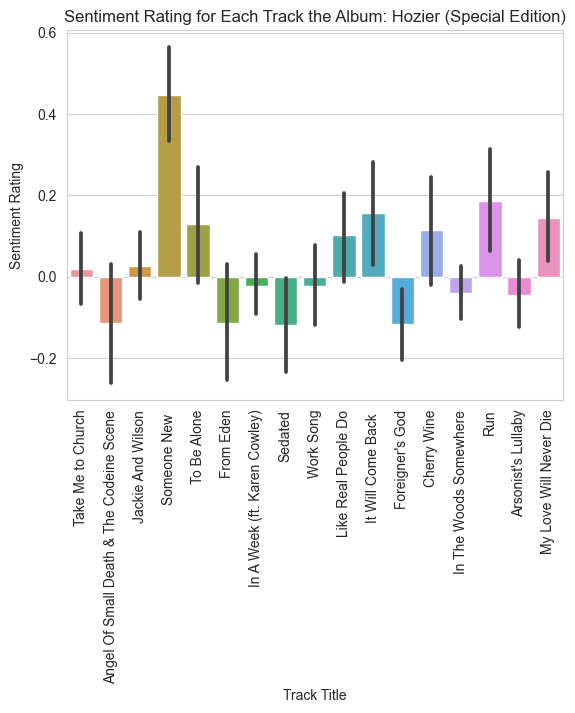

In [47]:
#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Hozier (Special Edition)'])

#Setting the plot title and labels
plt.title('Sentiment Rating for Each Track the Album: Hozier (Special Edition)')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### All Songs and Their Sentiment Ratings

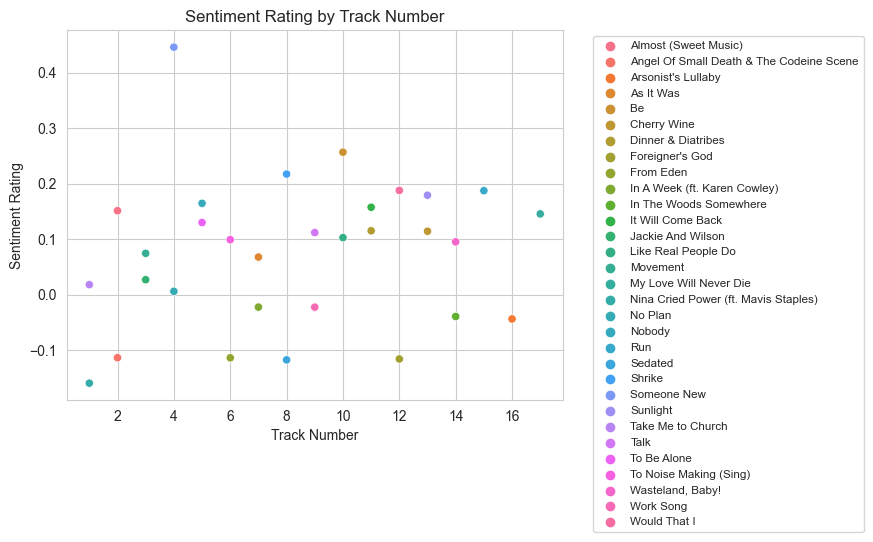

In [48]:
#Grouping the data by track title and track number and compute the average sentiment rating for each track
grouped = df.groupby(['Track_Title', 'Track_Number'])['Sentiment Rating'].mean().reset_index()

#Making a scatter plot of sentiment rating by track number for each track title
sns.scatterplot(x='Track_Number', y='Sentiment Rating', hue='Track_Title', data=grouped)

#Setting title and labels
plt.title('Sentiment Rating by Track Number')
plt.xlabel('Track Number')
plt.ylabel('Sentiment Rating')

#Fixing the font size and location of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()

## Common Words

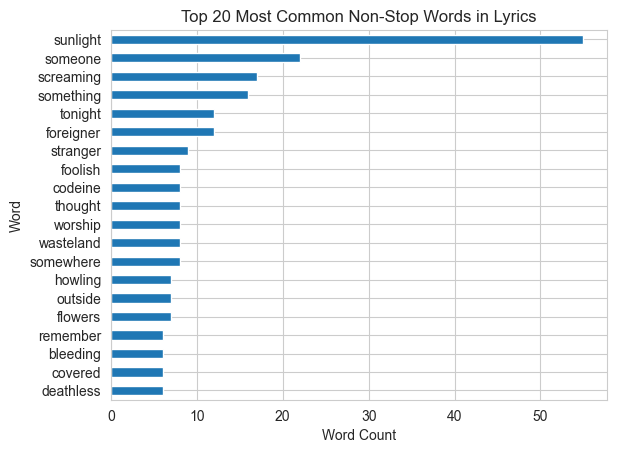

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#Extending stopwords...from above 
stop_words.extend(["oh", "like","should", "would", "could", "through", "let", "babe", "lover", "tell", "wouldn't", "couldn't", "shouldn't"])

#Tokenizing the lyrics column and filter out stop words and words with length <= 6
words = [w for w in nltk.word_tokenize(' '.join(df.Lyrics).lower()) if w not in stopwords.words('english') and len(w) > 6]

#Creating a pandas series with the word counts and plot the top 20 words in a horizontal bar chart
pd.Series(words).value_counts()[:20][::-1].plot(kind='barh')

#Setting the plot title and labels
plt.title('Top 20 Most Common Non-Stop Words in Lyrics')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()